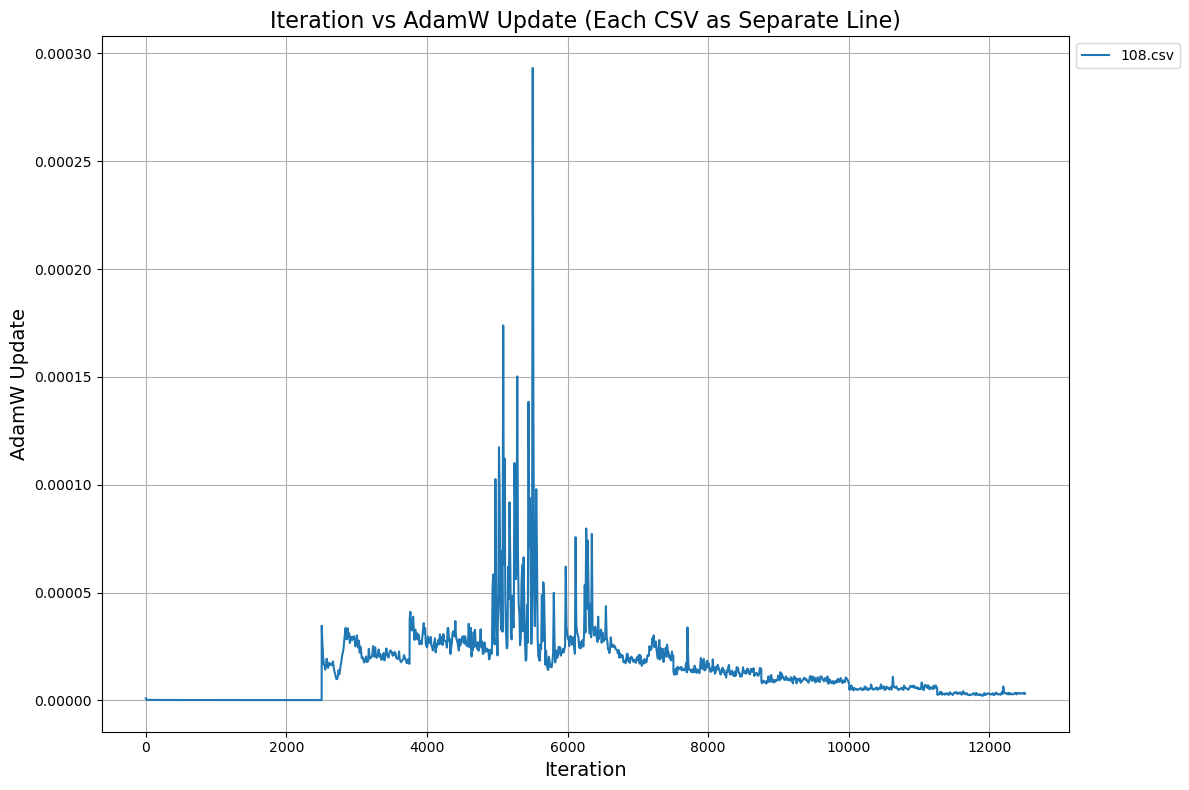

In [421]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 디렉토리 경로 설정
directory_path = '/home/shkim/QT_DeiT_small/reproduce/updated_optimizer_state_report_pertensor10'

# 그래프 초기화
plt.figure(figsize=(12, 8))

# 디렉토리 내 모든 CSV 파일 처리
for file_name in os.listdir(directory_path):
    if file_name.endswith('108.csv'):  # CSV 파일만 처리
        file_path = os.path.join(directory_path, file_name)
        
        # 데이터 읽기
        data = pd.read_csv(file_path)
        
        # 선 그래프 추가 (각 파일별로)
        plt.plot(data['iteration'], data['adamw_update'], label=file_name)

# 그래프 설정
plt.title('Iteration vs AdamW Update (Each CSV as Separate Line)', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('AdamW Update', fontsize=14)

# 레전드 설정 (그래프 바깥에 표시)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()


In [3]:
import os
import pandas as pd

# 대상 디렉토리 경로 설정
directory_path = '/home/shkim/QT_DeiT_small/reproduce/probe_report'

# 디렉토리 내 모든 CSV 파일 찾기
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# [Epoch] 열의 값이 9인 행 제거 및 파일 저장
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # [Epoch] 열이 9인 행 제거
    if 'Epoch' in df.columns:
        df = df[df['Epoch'] != 9]
        
        # 변경된 데이터프레임 저장
        df.to_csv(file_path, index=False)
        print(f"Updated file: {csv_file}")
    else:
        print(f"Skipped file (no 'Epoch' column): {csv_file}")

print("Processing complete.")


Updated file: top3_indices_Input_MLP(fc2).csv
Updated file: top3_indices_Output_MLP(fc1).csv
Updated file: top3_indices_attn.proj.weight.csv
Updated file: top3_indices_HeadX_grad_before.csv
Updated file: top3_indices_Output_MLP(fc2).csv
Updated file: probe_result_During_MLP(fc1)weight.csv
Updated file: top3_indices_HeadW_grad_after.csv
Updated file: top3_indices_mlp.fc1.weight.csv
Updated file: probe_result_During_MLP(fc2)X_grad_before.csv
Updated file: probe_result_During_MLP(fc1)X_grad_after.csv
Updated file: top3_indices_QK_Logit_Softmax.csv
Updated file: probe_result_During_MLP(fc1)X_grad_before.csv
Updated file: top3_indices_head.csv
Updated file: probe_result_QK_Logit.csv
Updated file: probe_result_attn.qkv.weight.csv
Updated file: top3_indices_mlp.fc2.weight.csv
Updated file: probe_result_HeadX_grad_after.csv
Updated file: top3_indices_During_MLP(fc2)weight.csv
Updated file: top3_indices_During_MLP(fc1)W_grad_after.csv
Updated file: probe_result_qkvX_grad_after.csv
Updated file:

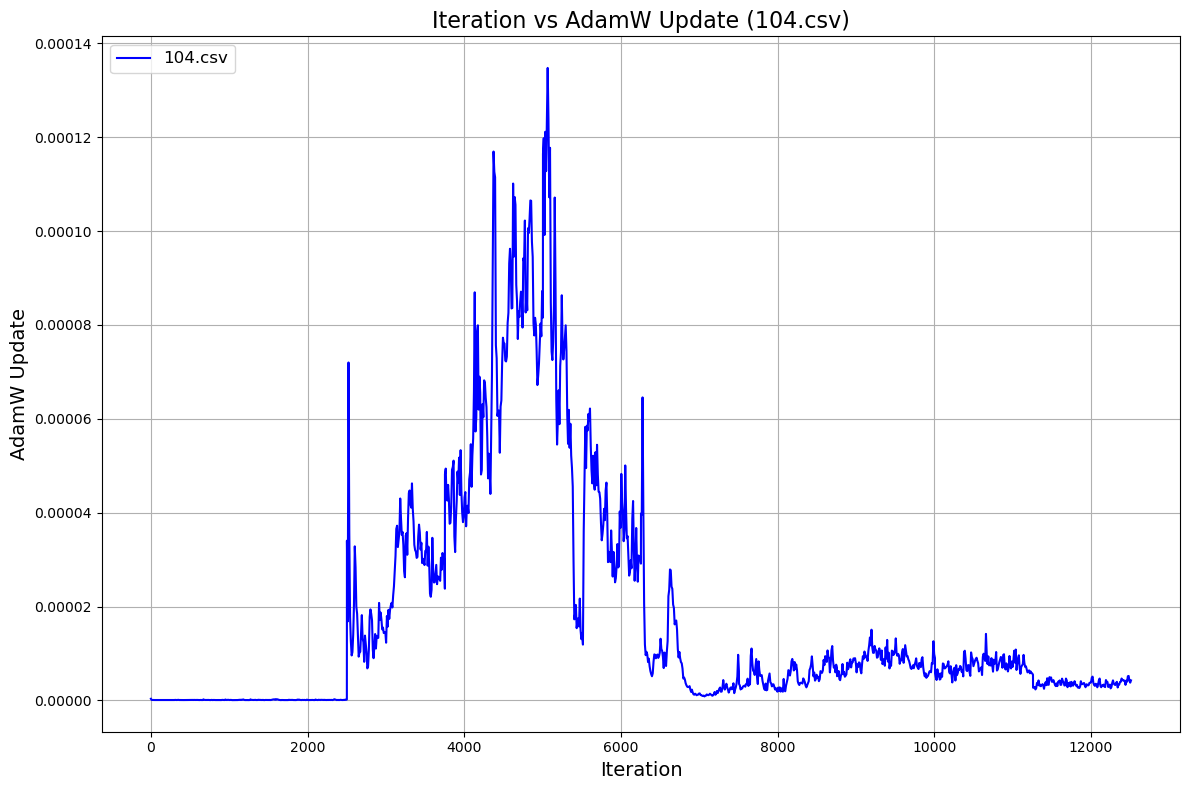

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

# 특정 파일 경로 설정
file_path = '/home/shkim/QT_DeiT_small/reproduce/updated_optimizer_state_report_pertensor10/147.csv'

# 데이터 읽기
data = pd.read_csv(file_path)

# 그래프 초기화
plt.figure(figsize=(12, 8))

# Iteration vs AdamW Update 선 그래프
plt.plot(data['iteration'], data['adamw_update'], label='104.csv', color='blue')

# 그래프 설정
plt.title('Iteration vs AdamW Update (104.csv)', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('AdamW Update', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# 그래프 출력
plt.tight_layout()
plt.show()


/tmp/ipykernel_3504432/4116903061.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20", len(blocks))


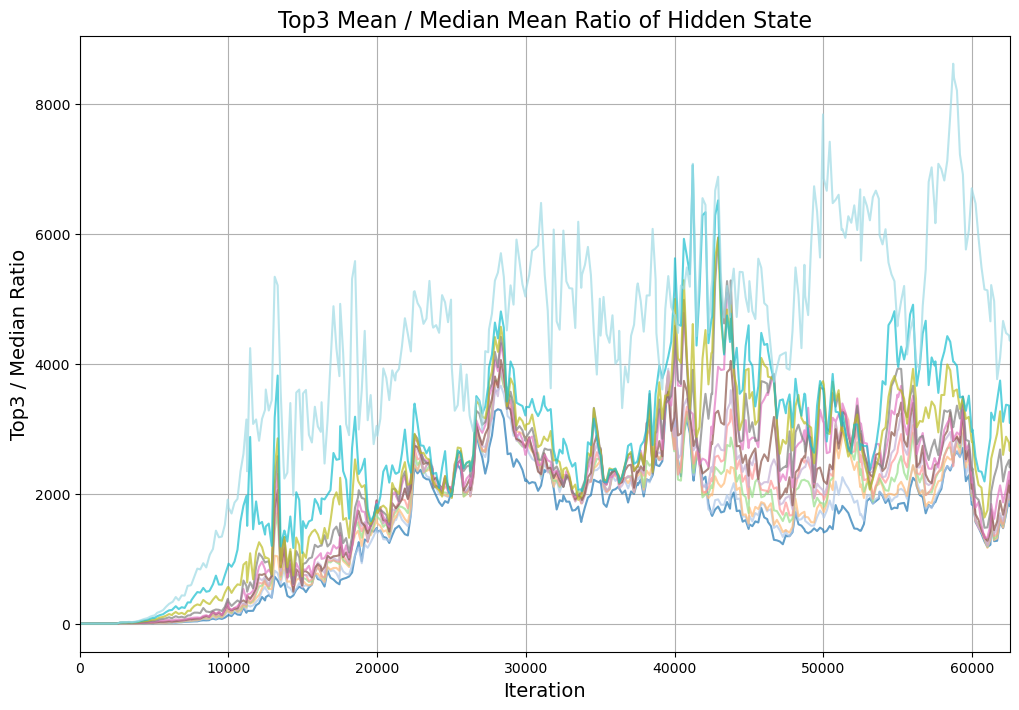

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# 파일 경로 설정
directory_name = 'probe_report_pertensor_ag_fp'
file_name = 'probe_result_Hidden_State'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/{directory_name}/{file_name}.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# Block별로 데이터를 그룹화
blocks = df['Block'].unique()

# 그래프 초기화
plt.figure(figsize=(12, 8))
cmap = get_cmap("tab20", len(blocks))

# Block별로 Plot
for i, block in enumerate(blocks):
    block_data = df[df['Block'] == block]
    # Top3 Mean / Median Mean 비율 계산
    ratio = block_data['Top3 Mean']
    plt.plot(block_data['Iteration'], ratio, label=f'Block {block} - Top3/Median Ratio', color=cmap(i), alpha=0.7)

# 그래프 설정
plt.xlim(0, 62550)
# plt.ylim(-20000, 20000)
plt.title('Top3 Mean / Median Mean Ratio of Hidden State', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Top3 / Median Ratio', fontsize=14)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# 축의 숫자를 순수한 형태로 표시 (1e6 제거)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

# 그래프 출력
plt.show()


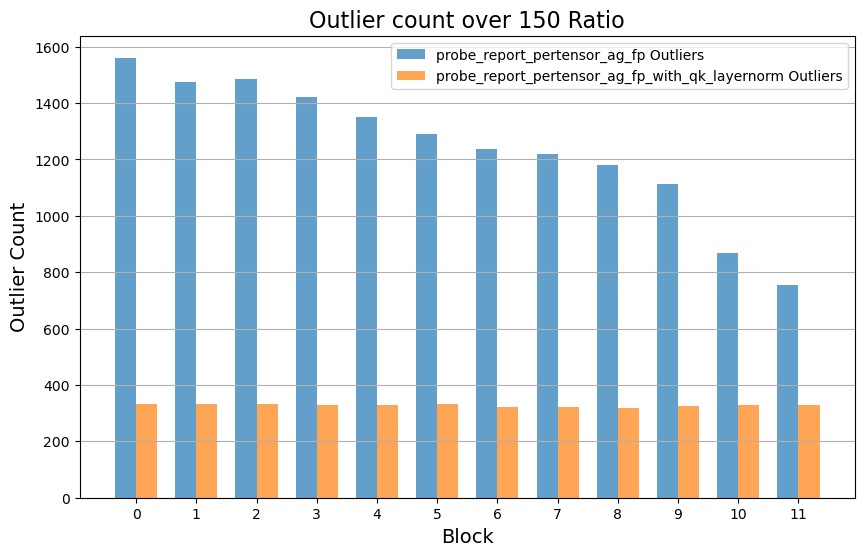

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
#probe_report_finegrained_ag_fp_with_qk_layernorm
#probe_report_pertensor_ag_fp_with_qk_layernorm
#probe_report_finegrained_ag_fp
#probe_report_pertensor_ag_fp
# 파일 경로 설정 함수
def get_file_path(directory_name, file_name):
    return f'/home/shkim/QT_DeiT_small/reproduce/{directory_name}/{file_name}.csv'

# 파일 경로 설정
directory_name_1 = 'probe_report_pertensor_ag_fp'
directory_name_2 = 'probe_report_pertensor_ag_fp_with_qk_layernorm'
file_name = 'probe_result_Hidden_State'

file_path_1 = get_file_path(directory_name_1, file_name)
file_path_2 = get_file_path(directory_name_2, file_name)

# CSV 파일 읽기
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Block별로 데이터를 그룹화
blocks1 = df1['Block'].unique()
blocks2 = df2['Block'].unique()

outlier_counts_1 = []
outlier_counts_2 = []
threshold = 150  # 기준 threshold 설정

# 첫 번째 파일 - Outlier 탐지 및 count
for block in blocks1:
    block_data = df1[df1['Block'] == block]
    ratio = block_data['Top3 Mean'] / block_data['Median Mean']
    outliers = np.abs(ratio) > threshold
    outlier_counts_1.append(outliers.sum())

# 두 번째 파일 - Outlier 탐지 및 count
for block in blocks2:
    block_data = df2[df2['Block'] == block]
    ratio = block_data['Top3 Mean'] / block_data['Median Mean']
    outliers = np.abs(ratio) > threshold
    outlier_counts_2.append(outliers.sum())

# 그래프 시각화 - Outlier 수 비교
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(blocks1))

plt.bar(index, outlier_counts_1, bar_width, label=f'{directory_name_1} Outliers', alpha=0.7)
plt.bar(index + bar_width, outlier_counts_2, bar_width, label=f'{directory_name_2} Outliers', alpha=0.7)

plt.title(f'Outlier count over {threshold} Ratio', fontsize=16)
plt.xlabel('Block', fontsize=14)
plt.ylabel('Outlier Count', fontsize=14)
plt.xticks(index + bar_width / 2, blocks1)
plt.legend()
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_3259660/3678185633.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20", len(blocks))


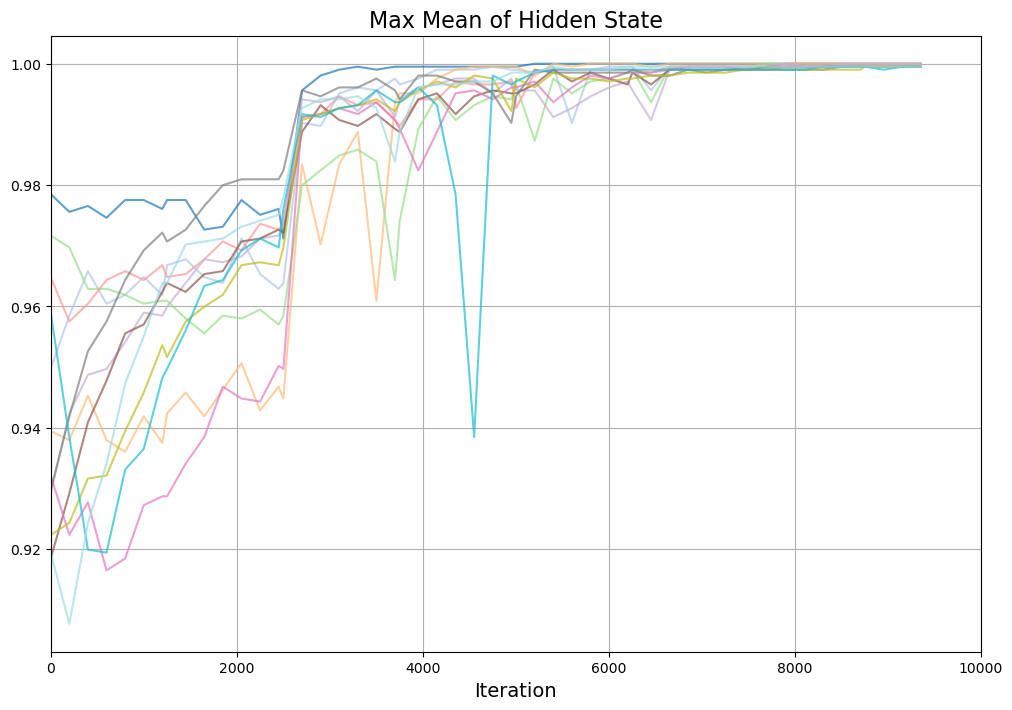

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# 파일 경로 설정
#probe_report_finegrained_ag_fp_with_qk_layernorm
#probe_report_pertensor_ag_fp_with_qk_layernorm
#probe_report_finegrained_ag_fp
#probe_report_pertensor_ag_fp

#probe_result_Attention_Logit
#probe_result_Hidden_State
directory_name = 'probe_report_finegrained_wgfp_qkl_sigmoid'
file_name = 'probe_result_QK_Logit_Softmax'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/{directory_name}/{file_name}.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# Block별로 데이터를 그룹화
blocks = df['Block'].unique()

# 그래프 초기화
plt.figure(figsize=(12, 8))
cmap = get_cmap("tab20", len(blocks))

# Block별로 Plot
for i, block in enumerate(blocks):
    block_data = df[df['Block'] == block]
    plt.plot(block_data['Iteration'], block_data['Top3 Mean'], label=f'Block {block} - Top3 Mean', color=cmap(i), alpha=0.7) 
    # plt.plot(block_data['Iteration'], block_data['Median Mean'], label=f'Block {block} - Median Mean', color=cmap(i), alpha=0.7)
    

# x축 limit 설정
plt.xlim(0, 10000)
# plt.ylim(0,120)


# 그래프 설정
plt.title('Max Mean of Hidden State', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('', fontsize=14)
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# 그래프 출력
plt.show()


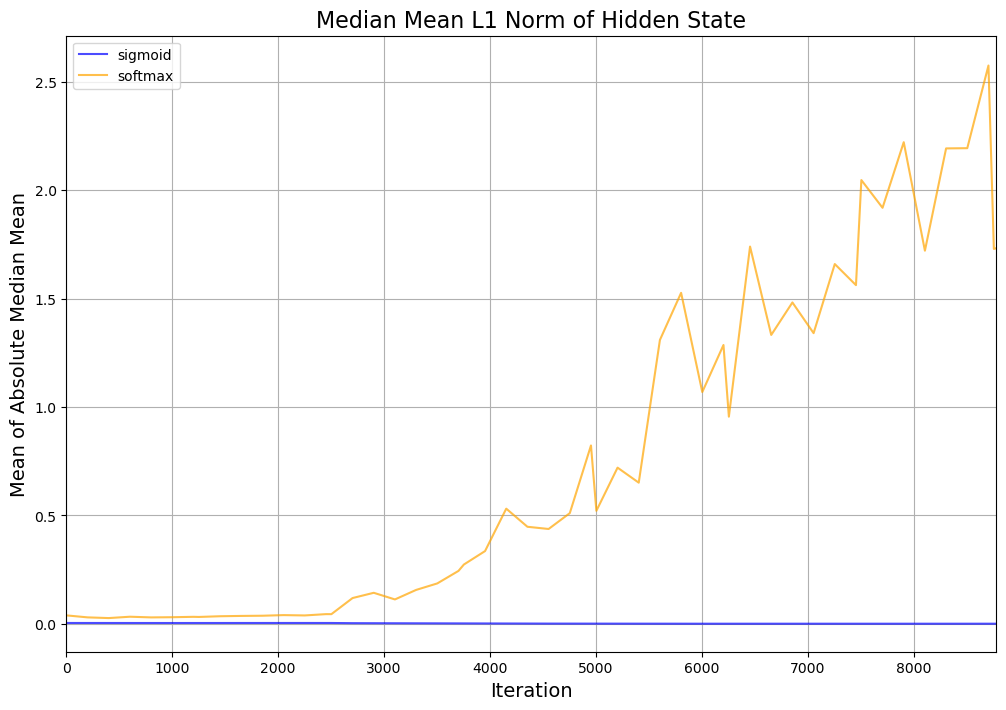

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# 파일 경로 설정 함수
def get_file_path(directory_name, file_name):
    return f'/home/shkim/QT_DeiT_small/reproduce/{directory_name}/{file_name}.csv'
#probe_report_finegrained_ag_fp_with_qk_layernorm
#probe_report_pertensor_ag_fp_with_qk_layernorm
#probe_report_finegrained_ag_fp
#probe_report_pertensor_ag_fp
# 옵션 설정
metric_to_plot = 'Median Mean'  # 'Top3 Mean' 또는 'Median Mean'
directory_name_1 = 'probe_report_finegrained_wgfp_qkl_learnable_kvCache_fp16'
directory_name_2 = 'probe_report_finegrained_ag_fp_QK'
file_name = 'probe_result_QK_Logit'

# 첫 번째 파일 읽기
file_path_1 = get_file_path(directory_name_1, 'probe_result_QK_Logit_Softmax')
df1 = pd.read_csv(file_path_1)

# 두 번째 파일 읽기
file_path_2 = get_file_path(directory_name_2, file_name)
df2 = pd.read_csv(file_path_2)

# 선택한 메트릭의 절대값 취하기
df1[metric_to_plot] = df1[metric_to_plot].abs()
df2[metric_to_plot] = df2[metric_to_plot].abs()

# Iteration별 평균 계산
df1_mean_data = df1.groupby('Iteration')[metric_to_plot].mean().reset_index()
df2_mean_data = df2.groupby('Iteration')[metric_to_plot].mean().reset_index()

# 그래프 초기화
plt.figure(figsize=(12, 8))

# 첫 번째 파일 Plot
plt.plot(df1_mean_data['Iteration'], df1_mean_data[metric_to_plot], label=f'sigmoid', color='blue', alpha=0.7)

# 두 번째 파일 Plot
plt.plot(df2_mean_data['Iteration'], df2_mean_data[metric_to_plot], label=f'softmax', color='orange', alpha=0.7)

# x축 limit 설정
plt.xlim(0, 8781)

# 그래프 설정
plt.title(f'{metric_to_plot} L1 Norm of Hidden State', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel(f'Mean of Absolute {metric_to_plot}', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# 그래프 출력
plt.show()


In [3]:
import numpy as np
import torch

# 1. .npy 파일 로드
file_path = "/home/shkim/QT_DeiT_small/reproduce/zz_prefix_patch_token_for_initialization/raw_background_patch_token.npy"
prefix_token_np = np.load(file_path)

# 2. 텐서로 변환
prefix_token_tensor = torch.tensor(prefix_token_np, dtype=torch.float32)

# 3. 텐서 크기 출력
print("Tensor shape:", prefix_token_tensor.shape)

# 4. 두 번째 차원 기준으로 데이터 비교
# 첫 번째 값을 기준으로 나머지 값과 비교
all_equal = torch.all(prefix_token_tensor[:, 1, :] == prefix_token_tensor[:, 2:, :])

# 5. 결과 출력
if all_equal:
    print("모든 두 번째 차원 데이터가 동일합니다.")
else:
    print("두 번째 차원 데이터가 동일하지 않습니다.")

Tensor shape: torch.Size([1, 5, 384])
두 번째 차원 데이터가 동일하지 않습니다.


/tmp/ipykernel_2635495/372195129.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20", len(blocks))


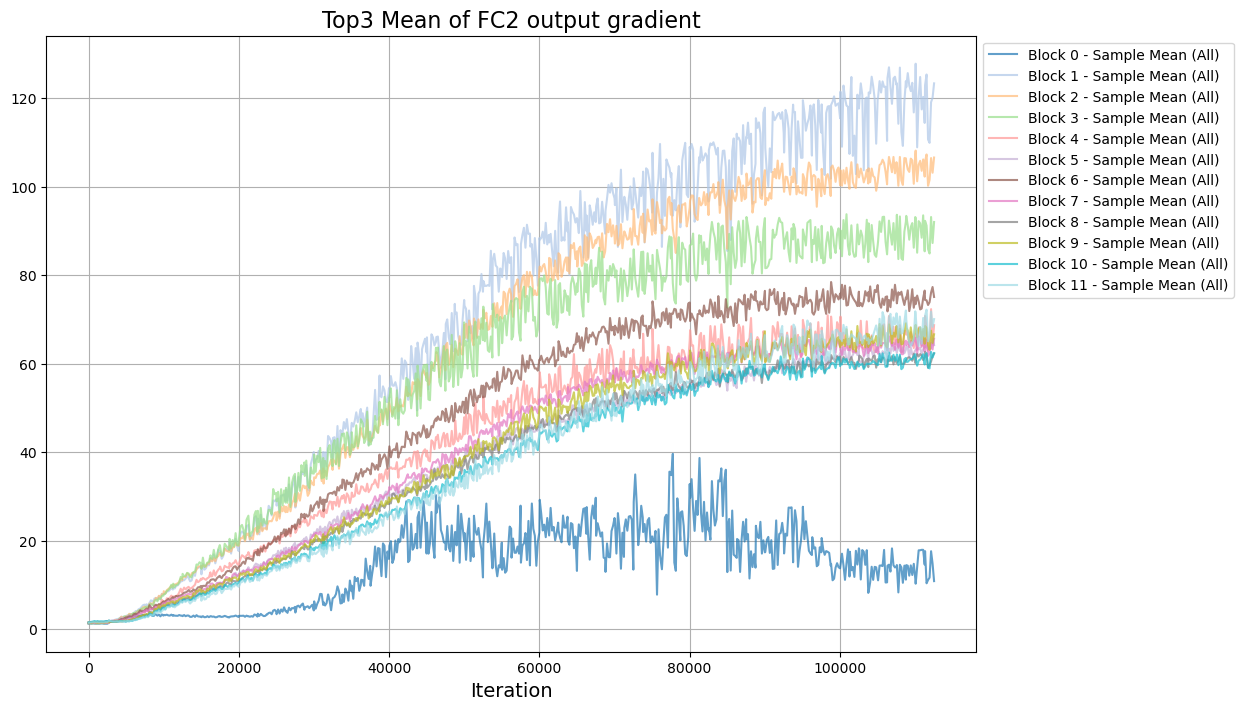

In [474]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# 파일 경로 설정
directory_name = 'probe_report_deit_finegrained_ag_fp_with_qk_layernorm'
file_name = 'probe_result_Attention_Logit'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/{directory_name}/{file_name}.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# Block별로 데이터를 그룹화
blocks = df['Block'].unique()

# 그래프 초기화
# 그래프 초기화
plt.figure(figsize=(12, 8))
cmap = get_cmap("tab20", len(blocks))

# Block별로 Plot
for i, block in enumerate(blocks):
    block_data = df[df['Block'] == block]
    # plt.plot(block_data['Iteration'], block_data['Sample Mean (All)'], label=f'Block {block} - Sample Mean (All)', color=cmap(i), alpha=0.7)
    plt.plot(block_data['Iteration'], block_data['Top3 Mean'], label=f'Block {block} - Sample Mean (All)', color=cmap(i), alpha=0.7)
    # plt.plot(block_data['Iteration'], block_data['Median Mean'], color=cmap(i), linestyle='--', alpha=0.7)


# 그래프 설정
plt.title('Top3 Mean of FC2 output gradient', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# 그래프 출력
plt.show()


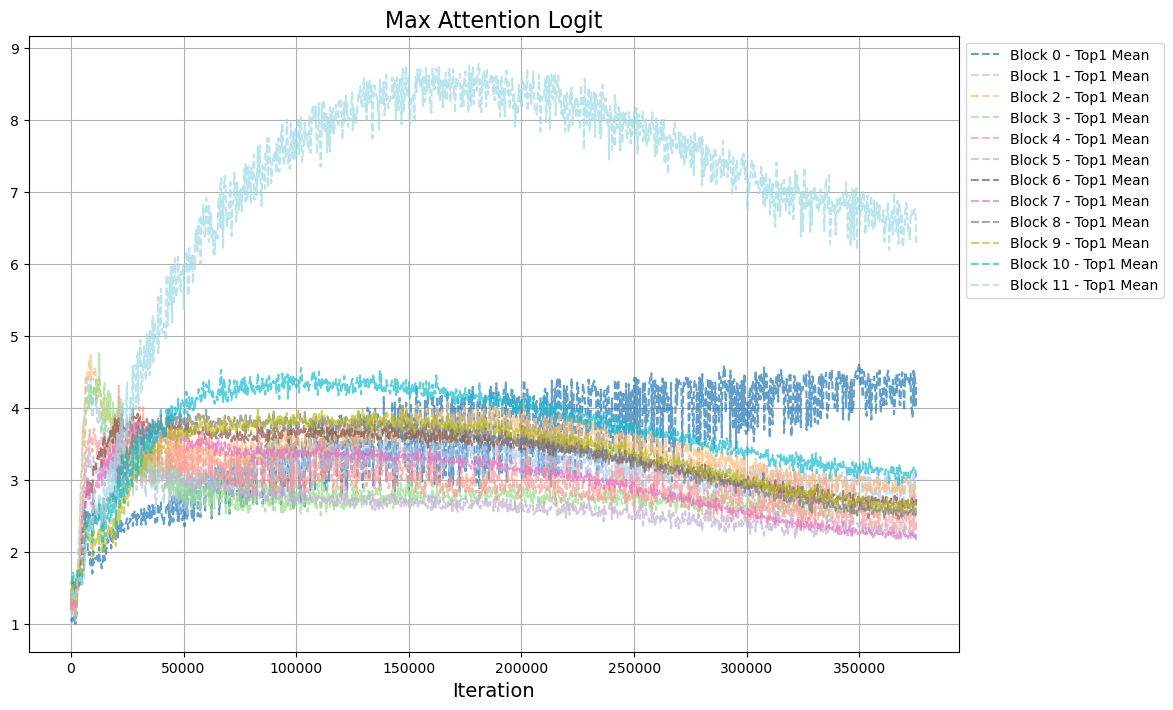

In [456]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# 파일 경로 설정
directory_name = 'updated_probe_report_fullprecision300'
file_name = 'probe_result_Attention_Logit'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/{directory_name}/{file_name}.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# Block별로 데이터를 그룹화
blocks = df['Block'].unique()

# 그래프 초기화
# 그래프 초기화
plt.figure(figsize=(12, 8))
# cmap = get_cmap("tab20", len(blocks))

# Block별로 Plot
for i, block in enumerate(blocks):
    block_data = df[df['Block'] == block]
    # plt.plot(block_data['Iteration'], block_data['Median Mean'], label=f'Block {block} - Sample Min', color=cmap(i), alpha=0.7)
    plt.plot(block_data['Iteration'], block_data['Top1 Mean'], label=f'Block {block} - Top1 Mean', color=cmap(i), linestyle='--', alpha=0.7)


# plt.xlim(0,12550)
# plt.ylim(0,30)
# 그래프 설정
plt.title('Max Attention Logit', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
# plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

/tmp/ipykernel_2635495/1655820387.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab20", len(blocks))


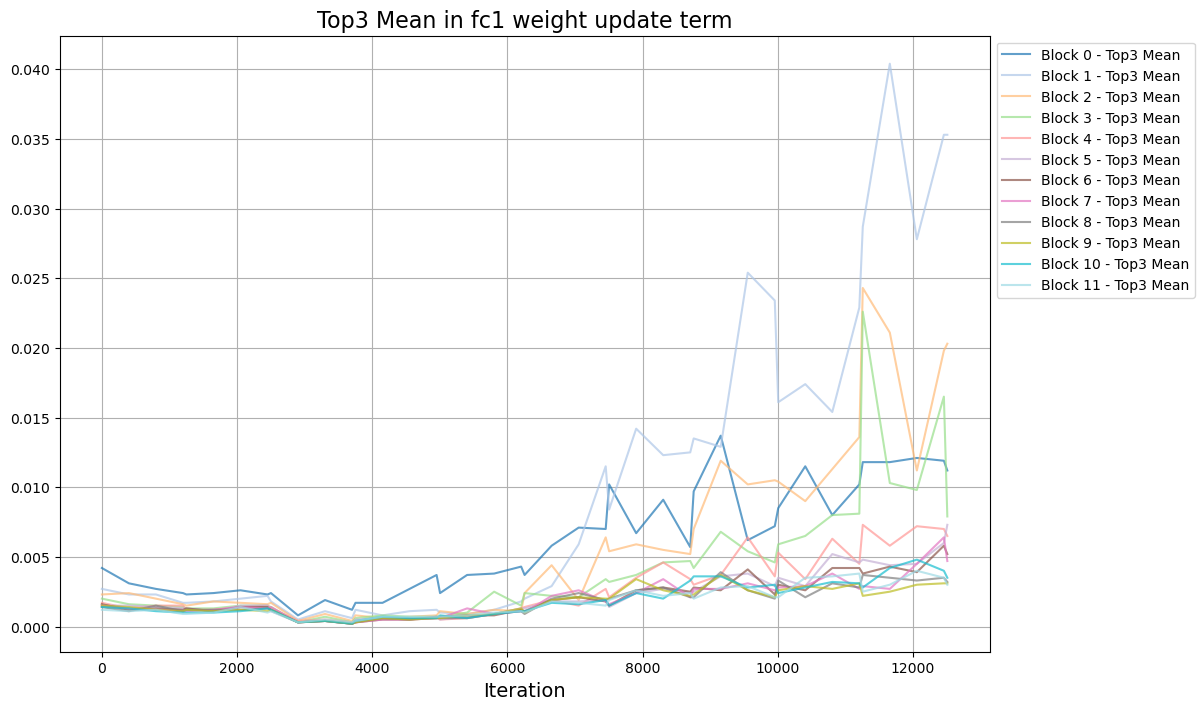

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# 파일 경로 설정
directory_name = 'updated_probe_report_fullprecision300'
file_name = 'probe_result_mlp.fc1.weight'
file_path = f'/home/shkim/QT_DeiT_small/reproduce/{directory_name}/{file_name}.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# Iteration <= 12510 필터링
df = df[df['Iteration'] <= 12510]

# Block별로 데이터를 그룹화
blocks = df['Block'].unique()

# 그래프 초기화
plt.figure(figsize=(12, 8))
cmap = get_cmap("tab20", len(blocks))

# Block별로 Plot
for i, block in enumerate(blocks):
    block_data = df[df['Block'] == block]
    plt.plot(block_data['Iteration'], block_data['Top3 Mean'], label=f'Block {block} - Top3 Mean', color=cmap(i), alpha=0.7)

# 그래프 설정
plt.title('Top3 Mean in fc1 weight update term', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)

# 그래프 출력
plt.show()


In [189]:
import os
import numpy as np

# Directory containing .npy files
dir_path = "/home/shkim/QT_DeiT_small/reproduce/weights_for_plot"

try:
    # List all .npy files in the directory and sort them alphabetically
    npy_files = sorted([f for f in os.listdir(dir_path) if f.endswith('.npy')])

    # Initialize lists to store results
    file_averages = []
    file_top1_values = []

    for file_name in npy_files:
        # Load the .npy file
        file_path = os.path.join(dir_path, file_name)
        data = np.load(file_path)

        # Compute the average and top 1 value
        avg_value = np.mean(data)
        top1_value = np.max(data)

        # Append results to the lists
        file_averages.append((file_name, avg_value))
        file_top1_values.append((file_name, top1_value))

    # Output results
    print("Average values for each file (sorted by file name):")
    for file_name, avg in file_averages:
        print(f"{file_name}: {avg}")

    print("\nTop 1 values for each file (sorted by file name):")
    for file_name, top1 in file_top1_values:
        print(f"{file_name}: {top1}")

except Exception as e:
    print(f"Error: {e}")


Average values for each file (sorted by file name):
weights_head_epoch0_iter0_Attention_proj.npy: -0.00010824203491210938
weights_head_epoch0_iter0_During_MLP(fc1).npy: -1.8775463104248047e-05
weights_head_epoch0_iter0_During_MLP(fc2).npy: 4.112720489501953e-06
weights_head_epoch0_iter0_qkv.npy: 4.589557647705078e-05
weights_head_epoch0_iter200_Attention_proj.npy: -0.00010824203491210938
weights_head_epoch0_iter200_During_MLP(fc1).npy: -1.8775463104248047e-05
weights_head_epoch0_iter200_During_MLP(fc2).npy: 4.0531158447265625e-06
weights_head_epoch0_iter200_qkv.npy: 4.589557647705078e-05

Top 1 values for each file (sorted by file name):
weights_head_epoch0_iter0_Attention_proj.npy: 0.051025390625
weights_head_epoch0_iter0_During_MLP(fc1).npy: 0.051025390625
weights_head_epoch0_iter0_During_MLP(fc2).npy: 0.0255126953125
weights_head_epoch0_iter0_qkv.npy: 0.051025390625
weights_head_epoch0_iter200_Attention_proj.npy: 0.05108642578125
weights_head_epoch0_iter200_During_MLP(fc1).npy: 0.05

In [3]:
import os
import pandas as pd
import numpy as np

# 폴더 경로 지정
folder_path = "/home/shkim/QT_DeiT_small/reproduce/optimizer_state_report_finegrained_real"

# 폴더 내 모든 CSV 파일 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 검사 결과 저장용 리스트
results = []

# 모든 CSV 파일 확인
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    

    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 무한대(inf) 값이 있는지 확인
    if np.isinf(df.to_numpy()).any():
        results.append((file_name, "Contains inf values"))
        print(f"File: {file_name} - Contains inf values")


In [15]:
import os
import pandas as pd
import numpy as np

# 폴더 경로 지정
folder_path = "/home/shkim/QT_DeiT_small/reproduce/output_softmax_probing"

# 파일명에 'grads'가 포함된 CSV 파일만 필터링
csv_files = [f for f in os.listdir(folder_path) if 'grads' in f and f.endswith('.csv')]

# 결과 저장용 리스트
results = []

# 파일별 값 계산
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)

    try:
        # 헤더를 포함한 CSV 파일 읽기
        df = pd.read_csv(file_path)

        # 전체 데이터를 float로 변환 (헤더 제외)
        data = df.iloc[:, :].values.astype(float)  # 전체 데이터를 NumPy 배열로 변환

        # 전체 데이터에서 min, mean, max 계산
        max_val = np.max(data)  # 전체 데이터에서 최대값
        mean_val = np.mean(data)  # 전체 데이터에서 평균값
        min_val = np.min(data)  # 전체 데이터에서 최소값

        # 결과 저장
        results.append({
            "File Name": file_name,
            "Max Value": max_val,
            "Mean Value": mean_val,
            "Min Value": min_val,
        })

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print(results_df)


                 File Name  Max Value    Mean Value  Min Value
0   iteration_11_grads.csv   0.010004 -4.915622e-11  -0.829784
1   iteration_14_grads.csv   0.008957 -4.936651e-11  -0.458702
2   iteration_12_grads.csv   0.010635  4.982788e-12  -0.628488
3   iteration_16_grads.csv   0.010609  5.033011e-11  -0.747573
4   iteration_18_grads.csv   0.008473 -2.454150e-12  -0.658510
5    iteration_4_grads.csv   0.010810  2.430105e-11  -0.899734
6    iteration_8_grads.csv   0.011846 -3.109280e-11  -0.613788
7   iteration_15_grads.csv   0.009987  2.778069e-11  -0.573036
8    iteration_2_grads.csv   0.011883  2.255647e-11  -0.802637
9   iteration_17_grads.csv   0.009062  3.094470e-11  -0.899505
10   iteration_7_grads.csv   0.009987  7.865175e-12  -0.638924
11  iteration_19_grads.csv   0.011605  6.694072e-11  -0.595825
12   iteration_3_grads.csv   0.010545 -1.300412e-11  -0.899581
13   iteration_9_grads.csv   0.010955  2.718051e-11  -0.468856
14   iteration_1_grads.csv   0.011971  6.338056e-11  -0

In [16]:
import os
import pandas as pd
import numpy as np

# 폴더 경로 지정
folder_path = "/home/shkim/QT_DeiT_small/reproduce/output_softmax_probing"

# 파일명에 'grads'가 포함된 CSV 파일만 필터링
csv_files = [f for f in os.listdir(folder_path) if 'grads' in f and f.endswith('.csv')]

# 결과 저장용 리스트
results = []

# 파일별 값 계산
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)

    try:
        # 헤더를 포함한 CSV 파일 읽기
        df = pd.read_csv(file_path)

        # 전체 데이터를 float로 변환 (헤더 제외)
        data = df.iloc[:, :].values.astype(float)  # 전체 데이터를 NumPy 배열로 변환

        # 전체 데이터에서 min, mean, max 계산
        max_val = np.max(data)  # 전체 데이터에서 최대값
        mean_val = np.mean(data)  # 전체 데이터에서 평균값
        min_val = np.min(data)  # 전체 데이터에서 최소값

        # 결과 저장
        results.append({
            "File Name": file_name,
            "Max Value": max_val,
            "Mean Value": mean_val,
            "Min Value": min_val,
        })

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print(results_df)


                 File Name  Max Value    Mean Value  Min Value
0   iteration_11_grads.csv   0.009079 -5.335925e-11  -0.829830
1   iteration_14_grads.csv   0.009913 -4.789378e-11  -0.458715
2   iteration_12_grads.csv   0.008406  7.935130e-13  -0.628459
3    iteration_4_grads.csv   0.009600  2.973014e-11  -0.899522
4    iteration_8_grads.csv   0.010661 -3.014559e-11  -0.613787
5   iteration_15_grads.csv   0.009677  2.595210e-11  -0.573090
6    iteration_2_grads.csv   0.010225  2.965337e-11  -0.802622
7    iteration_7_grads.csv   0.010031 -4.423462e-12  -0.638951
8    iteration_3_grads.csv   0.011064 -1.818534e-11  -0.899455
9    iteration_9_grads.csv   0.012496  3.119715e-11  -0.468850
10   iteration_1_grads.csv   0.010715  6.128807e-11  -0.898559
11  iteration_13_grads.csv   0.009343  6.337499e-11  -0.899072
12   iteration_0_grads.csv   0.010350 -1.930740e-11  -0.478329
13  iteration_10_grads.csv   0.008385 -1.218418e-11  -0.806936
14   iteration_5_grads.csv   0.009843  5.396274e-11  -0

In [4]:
import numpy as np

# 파일 경로
file_path = "/home/shkim/QT_DeiT_small/reproduce/zz_prefix_patch_token_for_initialization/white_patch_token.npy"

# .npy 파일 로드
data = np.load(file_path)

# 데이터의 차원 출력
print("Loaded data shape:", data.shape)


Loaded data shape: (1, 5, 384)


In [3]:
import os
import numpy as np

# 디렉토리 경로
file_path = "/home/shkim/QT_DeiT_small/reproduce/zz_prefix_patch_token_for_initialization"

# 디렉토리 내 모든 .npy 파일 처리
for filename in os.listdir(file_path):
    if filename.endswith(".npy"):
        full_path = os.path.join(file_path, filename)

        # .npy 파일 로드
        data = np.load(full_path)

        # 차원을 (1, 5, 384)로 변경
        if data.shape[0] == 256:  # (256, 5, 384) 구조 확인
            new_data = data[:1]  # 첫 번째 배치만 추출 (1, 5, 384)

            # 새로운 데이터 저장 (덮어쓰기)
            np.save(full_path, new_data)
            print(f"Updated {filename}: new shape {new_data.shape}")
        else:
            print(f"Skipped {filename}: unexpected shape {data.shape}")


Updated median_background_patch_token.npy: new shape (1, 5, 384)
Updated white_patch_token.npy: new shape (1, 5, 384)
Updated mean_background_patch_token.npy: new shape (1, 5, 384)
Updated black_patch_token.npy: new shape (1, 5, 384)
Updated raw_background_patch_token.npy: new shape (1, 5, 384)
